In [50]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
#Pandas reads in data as a pandas dataframe assigned to alias df.
#.head() allows us to preview the dataframe while .columns gives us column titles

df=pd.read_csv("kc_house_data.csv")
print(df.columns)
df.head()


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
df.info() # waterfront has 2376 nulls | yr_renovated has 3842 nulls | view has 63 nulls | sqft_basement is not int
          # grade => is KC grading system reliable? Is higher number good or bad?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
#Get number of rows,columns
df.shape

(21597, 21)

In [3]:
#Describe to get mathematical data
df.describe() 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [57]:
#df.profile_report()

In [ ]:
### Do lots with riverview have increased value? Number of floors? Can we max profits by increasing eitheir value? 
# Is sqft of lot related? Do we have large properties with space or is it high density? => Increase profits here?

In [12]:
# Let's find whether we can begin to replace null values for waterfront column? 
df["waterfront"].value_counts() 
# Only 146 properties have riverview, could assume missing values do not have riverview
# Is there another value which can indicate riverview?

0.0    19075
1.0      146
Name: waterfront, dtype: int64

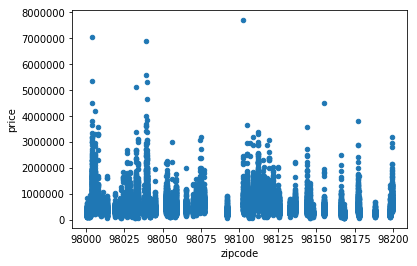

In [49]:
# First lets find the variation in price with zipcode => does the area heavily influence price?
df.plot(x="zipcode",y="price",kind="scatter")

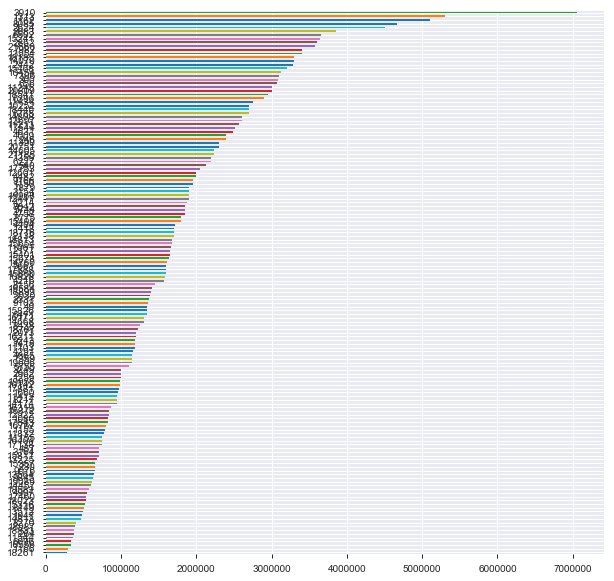

In [63]:
#Let's find prices of houses on waterfront and how much they vary in value

lots_with_riverview_price=df.loc[df["waterfront"]==1,"price"]
lots_with_riverview_price.sort_values().plot(y="id",kind="barh",figsize=(10,10))

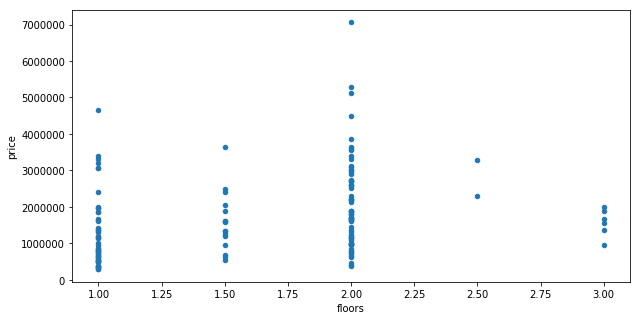

In [38]:
### Does number of floors affect price of lots with riverview?
# Reading data from df, for house with waterfront view (1=True).
lots_with_riverview=df.loc[df["waterfront"]==1,:]

#Then plotting df of house with waterview for prices w/ number of floors to see if this has affect on price => not really...
# How are there half values??
lots_with_riverview.plot(x="floors",y="price",kind="scatter",figsize=(10,5))

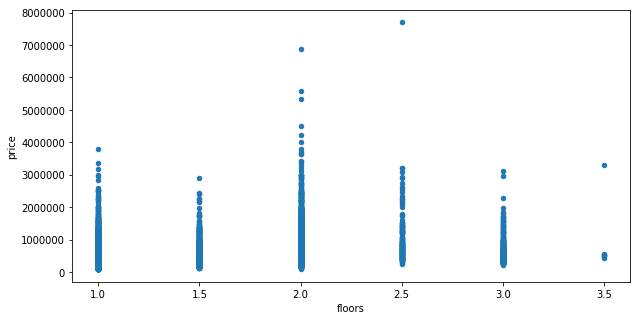

In [40]:
# same as above but for no riverview
lots_without_riverview=df.loc[df["waterfront"]==0,:]
lots_without_riverview.plot(x="floors",y="price",kind="scatter",figsize=(10,5))

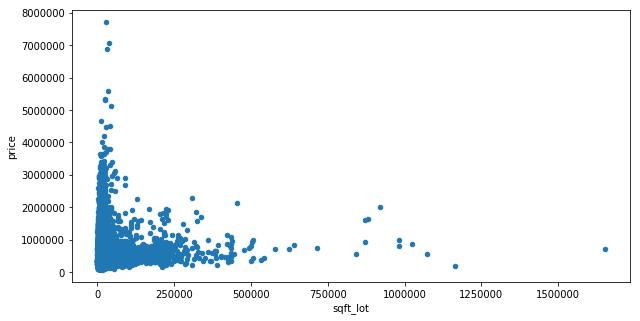

In [43]:
# What other factors affect price => below looks at sqft lot. 
df.plot(x="sqft_lot",y="price",kind="scatter",figsize=(10,5))

#Can see prices increase with sqft but also have very high property values for low ft. High density? IE city area?